In [2]:
from sklearn import datasets, svm, metrics
import matplotlib.pyplot as plt
import numpy as np

In [3]:
digits = datasets.load_digits()
print(np.amax(digits.data))
print(digits.data[0])
print(digits.images[0])

16.0
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


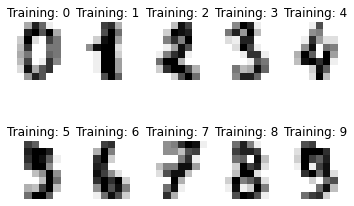

In [4]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:10]):
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

In [5]:
num_split = int(0.7*len(digits.data))

train_features = digits.data[:num_split]
train_labels =  digits.target[:num_split]
test_features = digits.data[num_split:]
test_labels = digits.target[num_split:]

In [6]:
print("Number of training examples: ",len(train_features))
print("Number of test examples: ",len(test_features))
print("Number of total examples:", len(train_features)+len(test_features))

Number of training examples:  1257
Number of test examples:  540
Number of total examples: 1797


In [7]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=5, algorithm='brute')
classifier.fit(train_features, train_labels)
predicted_labels = classifier.predict(test_features)
distances, neighbors = classifier.kneighbors(test_features)
print(neighbors,distances)


[[ 353  817  297  366 1254]
 [1177  588  725  824  328]
 [ 376  791  801  165  896]
 ...
 [ 148  248  242 1069  255]
 [ 254  251  849  417  199]
 [ 183  248 1015  513  224]] [[11.66190379 16.94107435 18.16590212 19.31320792 20.19900988]
 [21.09502311 21.47091055 21.61018278 21.74856317 21.81742423]
 [18.02775638 18.1934054  19.62141687 21.16601049 21.9317122 ]
 ...
 [20.83266666 21.70253441 22.93468988 24.0208243  25.63201124]
 [19.5192213  21.09502311 23.87467277 24.69817807 24.8394847 ]
 [26.73948391 27.62245463 27.73084925 27.80287755 27.92848009]]


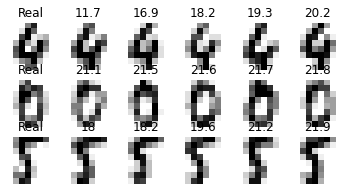

In [8]:
images_and_predictions = list(zip(digits.images[num_split:], neighbors,distances))
for i, (real_image, neighbor_index, dist) in enumerate(images_and_predictions[:3]):
    plt.subplot(4, 6, 1 + i*6)
    plt.axis('off')
    plt.imshow(real_image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Real')
    
    for j in range(len(neighbor_index)):
        index = neighbor_index[j]
        neighbor_image = digits.images[index]
        plt.subplot(4, 6, j+2 + i*6)
        plt.axis('off')
        plt.imshow(neighbor_image, cmap=plt.cm.gray_r, interpolation='nearest')
        plt.title('%.3g' % dist[j])

plt.show()

In [9]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print("Classification report for classifier %s:\n%s\n"
      % (classifier, classification_report(test_labels, predicted_labels)))
print("Confusion matrix:\n%s" % confusion_matrix(test_labels, predicted_labels))
print(accuracy_score(test_labels, predicted_labels))

Classification report for classifier KNeighborsClassifier(algorithm='brute'):
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        53
           1       0.95      0.98      0.96        53
           2       0.98      0.96      0.97        53
           3       0.96      0.92      0.94        53
           4       0.98      0.96      0.97        57
           5       0.95      0.98      0.96        56
           6       0.98      1.00      0.99        54
           7       0.95      1.00      0.97        54
           8       0.96      0.90      0.93        52
           9       0.96      0.95      0.95        55

    accuracy                           0.96       540
   macro avg       0.96      0.96      0.96       540
weighted avg       0.97      0.96      0.96       540


Confusion matrix:
[[52  0  0  0  1  0  0  0  0  0]
 [ 0 52  0  0  0  0  0  0  0  1]
 [ 1  0 51  1  0  0  0  0  0  0]
 [ 0  0  1 49  0  1  0  1  1  0]
 [ 0  0  0  

In [10]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10)
clusters = kmeans.fit(train_features)
clusters_data = kmeans.cluster_centers_
clusters_images = clusters_data.reshape(len(clusters_data),8,8)
clusters_images[0]

array([[ 0.00000000e+00, -5.55111512e-17,  2.05357143e-01,
         6.98214286e+00,  1.23839286e+01,  1.74107143e+00,
         2.05357143e-01,  7.14285714e-02],
       [ 1.30104261e-18,  1.78571429e-02,  3.12500000e+00,
         1.38660714e+01,  9.15178571e+00,  1.90178571e+00,
         1.30357143e+00,  4.01785714e-01],
       [ 6.50521303e-19,  6.96428571e-01,  1.07321429e+01,
         1.19196429e+01,  4.99107143e+00,  5.66071429e+00,
         4.33035714e+00,  4.46428571e-01],
       [ 8.92857143e-03,  4.92857143e+00,  1.47946429e+01,
         6.32142857e+00,  7.72321429e+00,  1.04017857e+01,
         5.72321429e+00,  2.67857143e-02],
       [ 0.00000000e+00,  8.77678571e+00,  1.47678571e+01,
         9.98214286e+00,  1.36517857e+01,  1.39910714e+01,
         5.16964286e+00,  0.00000000e+00],
       [ 1.16071429e-01,  5.75000000e+00,  1.04821429e+01,
         1.18571429e+01,  1.48482143e+01,  1.06517857e+01,
         1.69642857e+00,  3.46944695e-18],
       [ 8.92857143e-02,  8.928571

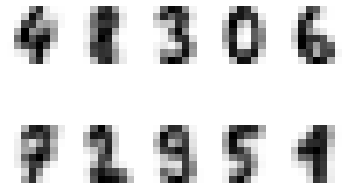

In [11]:
for index, image in enumerate(clusters_images):
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')

In [12]:
predicted = kmeans.predict(test_features)
print("Classification report for classifier %s:\n%s\n"
      % (classifier, classification_report(test_labels, predicted)))
print("Confusion matrix:\n%s" % confusion_matrix(test_labels, predicted))
print(test_features.shape)
test_images = test_features.reshape(len(test_features),8,8)

Classification report for classifier KNeighborsClassifier(algorithm='brute'):
              precision    recall  f1-score   support

           0       0.02      0.02      0.02        53
           1       0.44      0.66      0.53        53
           2       0.13      0.13      0.13        53
           3       0.00      0.00      0.00        53
           4       0.00      0.00      0.00        57
           5       0.00      0.00      0.00        56
           6       0.00      0.00      0.00        54
           7       0.00      0.00      0.00        54
           8       0.02      0.02      0.02        52
           9       0.20      0.09      0.13        55

    accuracy                           0.09       540
   macro avg       0.08      0.09      0.08       540
weighted avg       0.08      0.09      0.08       540


Confusion matrix:
[[ 1  0  0 52  0  0  0  0  0  0]
 [ 0 35  0  0  0  0  0  0  1 17]
 [ 0  1  7  1  0  0 41  3  0  0]
 [ 0  6 41  0  0  3  0  1  2  0]
 [52  1  0  

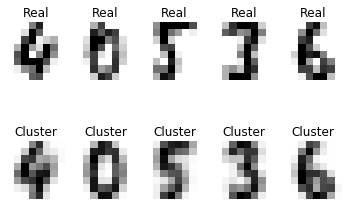

In [12]:
images_and_predictions = list(zip(test_images, predicted))
for i, (test_image, pred) in enumerate(images_and_predictions[:5]):
    plt.subplot(2, 5, 1 + i)
    plt.axis('off')
    plt.imshow(test_image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Real')
    

    plt.subplot(2, 5, 6 + i)
    plt.axis('off')
    plt.imshow(clusters_images[pred], cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Cluster')

plt.show()

In [13]:
from sklearn.metrics import completeness_score,homogeneity_score,adjusted_mutual_info_score
print("Completeness: {}".format(completeness_score(test_labels, predicted)))
print("homogeneity_score: {}".format(homogeneity_score(test_labels, predicted)))
print("adjusted_mutual_info_score: {}".format(adjusted_mutual_info_score(test_labels, predicted)))

Completeness: 0.7399762961438686
homogeneity_score: 0.7288382133360487
adjusted_mutual_info_score: 0.7248310666363125


In [14]:
adjusted_mutual_info_score([0, 0, 2, 2], [1, 1, 0, 0])

1.0